# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image

# Data

In [ ]:
temp_data=pd.read_csv('/content/temperature_device_failure.csv')

In [ ]:
temp_data

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551
...,...,...
7262,5/28/2014 11:00,72.370206
7263,5/28/2014 12:00,72.172956
7264,5/28/2014 13:00,72.046565
7265,5/28/2014 14:00,71.825226


Converting to date time

In [ ]:
temp_data["timestamp"] = pd.to_datetime(temp_data["timestamp"])

In [ ]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


plot

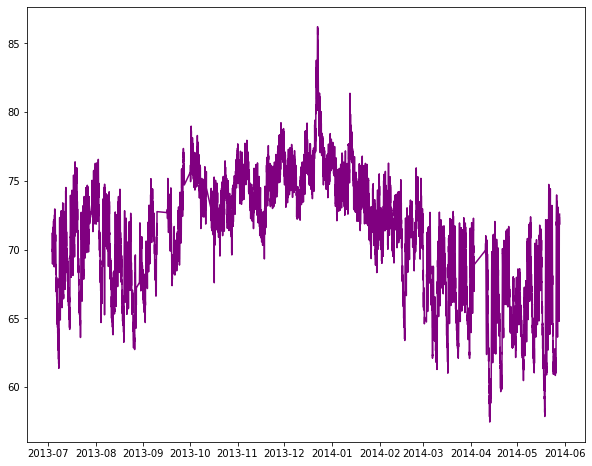

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(temp_data['timestamp'], temp_data['value'],color='purple');

Checking nulls

In [ ]:
temp_data.isnull().sum()

timestamp        0
value            0
month_number     0
year             0
hours            0
day_of_week      0
date_obj         0
temperature_C    0
dtype: int64

There are no nulls

Feature enginering

In [ ]:
temp_data["month_number"] = temp_data["timestamp"].dt.month
temp_data["year"] = temp_data["timestamp"].dt.year
temp_data["hours"] = temp_data["timestamp"].dt.hour
temp_data["day_of_week"] = temp_data["timestamp"].dt.dayofweek

I have created 4 new columns here which gives us month, year,hour and day of the week

In [ ]:
conditions=[
    ((temp_data['day_of_week']<=4 )& (temp_data['hours']>=7) & (temp_data['hours']<=19)),
    ((temp_data['day_of_week']<=4 )& (temp_data['hours']<=6) | (temp_data['hours']>=20)),
    ((temp_data['day_of_week']>=5 )& (temp_data['hours']>=7) & (temp_data['hours']<=19)),
    ((temp_data['day_of_week']>=5 )& (temp_data['hours']<=6) | (temp_data['hours']>=20))

]

In [ ]:
values=['weekday day','weekday night','weekend day','weekend night']

In [ ]:
temp_data['date_obj']=np.select(conditions,values)

Based on the conditions creating another feature which tells weather it is weekday day,weekday night, weekend day or weekend night

In [ ]:
temp_data

,timestamp,value,month_number,year,hours,day_of_week,date_obj
0,2013-07-04 00:00:00,69.880835,7,2013,0,3,weekday night
1,2013-07-04 01:00:00,71.220227,7,2013,1,3,weekday night
2,2013-07-04 02:00:00,70.877805,7,2013,2,3,weekday night
3,2013-07-04 03:00:00,68.959400,7,2013,3,3,weekday night
4,2013-07-04 04:00:00,69.283551,7,2013,4,3,weekday night
...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,5,2014,11,2,weekday day
7263,2014-05-28 12:00:00,72.172956,5,2014,12,2,weekday day
7264,2014-05-28 13:00:00,72.046565,5,2014,13,2,weekday day
7265,2014-05-28 14:00:00,71.825226,5,2014,14,2,weekday day


The temperature we have is in farenheit so converting it to celsius for my understanding

In [ ]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius

    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [ ]:
temp_data["temperature_C"] = fahr_to_celsius(temp_data["value"])

In [ ]:
temp_data.describe()

,value,month_number,year,hours,day_of_week,temperature_C
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,71.242433,6.539012,2013.457685,11.509289,2.988579,21.801352
std,4.247509,3.700338,0.498241,6.927370,1.979945,2.359727
min,57.458406,1.000000,2013.000000,0.000000,0.000000,14.143559
25%,68.369411,3.000000,2013.000000,5.500000,1.000000,20.205228
50%,71.858493,7.000000,2013.000000,12.000000,3.000000,22.143607
75%,74.430958,10.000000,2014.000000,18.000000,5.000000,23.572754
max,86.223213,12.000000,2014.000000,23.000000,6.000000,30.124007


In [ ]:
temp_data

,timestamp,value,month_number,year,hours,day_of_week,date_obj,temperature_C
0,2013-07-04 00:00:00,69.880835,7,2013,0,3,weekday night,21.044908
1,2013-07-04 01:00:00,71.220227,7,2013,1,3,weekday night,21.789015
2,2013-07-04 02:00:00,70.877805,7,2013,2,3,weekday night,21.598781
3,2013-07-04 03:00:00,68.959400,7,2013,3,3,weekday night,20.533000
4,2013-07-04 04:00:00,69.283551,7,2013,4,3,weekday night,20.713084
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,5,2014,11,2,weekday day,22.427892
7263,2014-05-28 12:00:00,72.172956,5,2014,12,2,weekday day,22.318309
7264,2014-05-28 13:00:00,72.046565,5,2014,13,2,weekday day,22.248092
7265,2014-05-28 14:00:00,71.825226,5,2014,14,2,weekday day,22.125126


In [ ]:
temp_data.to_csv('modified_temp_data.csv')

Power BI dashboard

In [ ]:
from PIL import Image

# creating a object
im = Image.open(r'/content/temp_data_dashboard_page-0001.jpg')


In [ ]:
im.show()

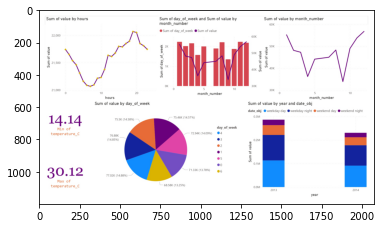

In [ ]:
import matplotlib.pyplot as plt
im = Image.open('/content/temp_data_dashboard_page-0001.jpg')
plt.imshow(im)
plt.show()

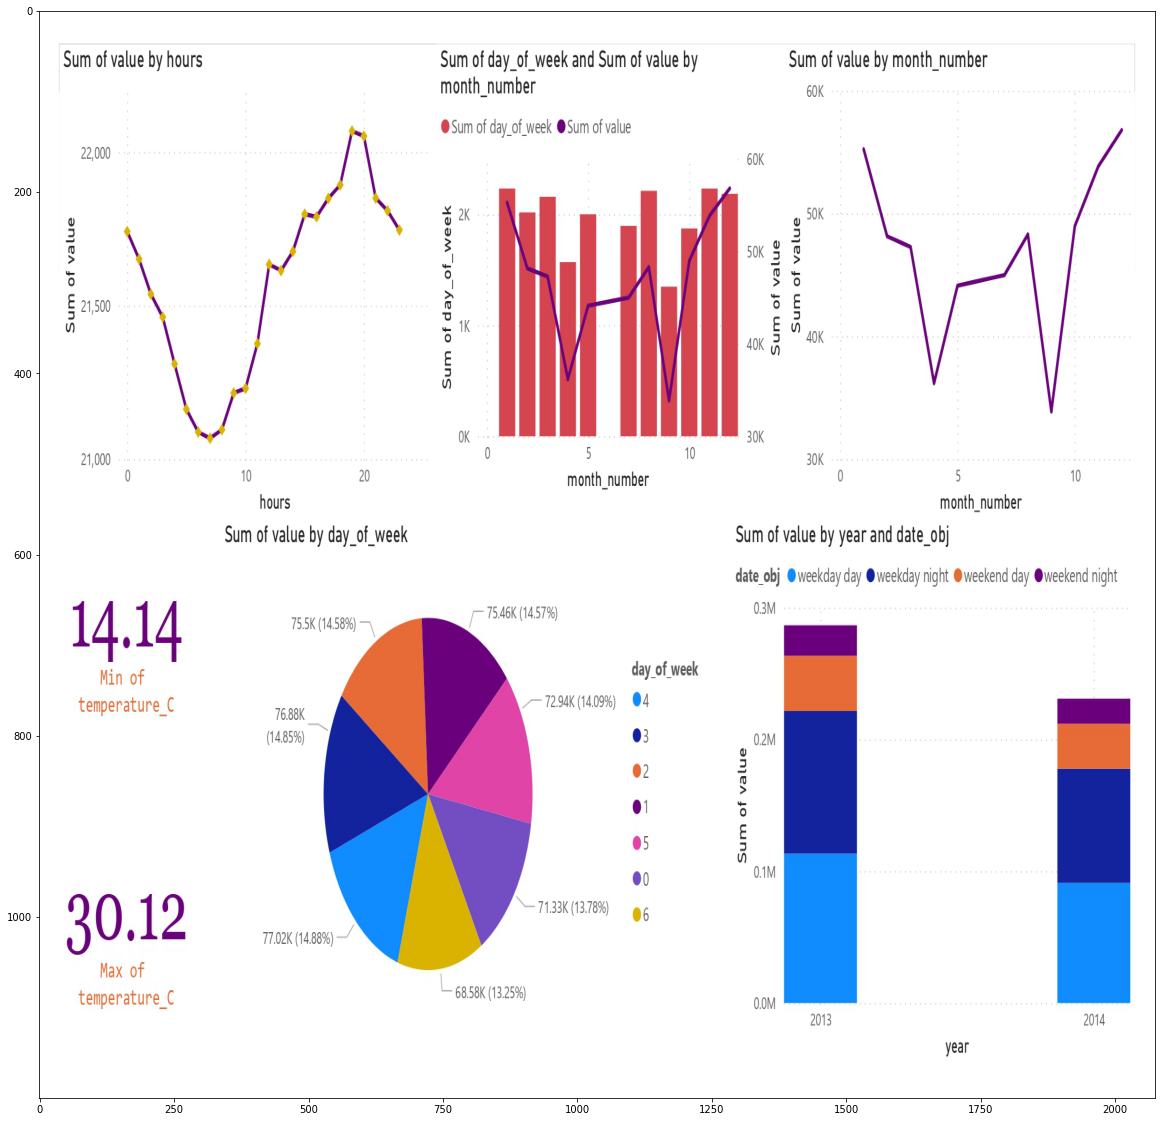

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg


image = mpimg.imread('/content/temp_data_dashboard_page-0001.jpg')
plt.figure(figsize = (20,20))
plt.imshow(image,aspect='auto')
plt.show()

From the first line chart we can tell that temperature raised at nights and dropped in the morning

From third chart we can tell that the temperature increased in winter period and decreased in summer

The temperature is max in weekdays and little low in weekends

The minimum temperature in celsius is 14 and max is 30 degrees

We have 2 years data where data is more in 2013 than 2014

### **Overall we say that the device might be a heater kind device which is most used at cold times.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
temp_data[['value','hours','day_of_week','month_number','year']]=scaler.fit_transform(temp_data[['value','hours','day_of_week','month_number','year']])
temp_data.head()

,timestamp,value,month_number,year,hours,day_of_week,date_obj,temperature_C,pca1,pca2
0,2013-07-04 00:00:00,-0.320586,0.124589,-0.918667,-1.661537,0.005769,weekday night,21.044908,0.446018,-1.473699
1,2013-07-04 01:00:00,-0.005228,0.124589,-0.918667,-1.517172,0.005769,weekday night,21.789015,0.588578,-1.263483
2,2013-07-04 02:00:00,-0.085851,0.124589,-0.918667,-1.372807,0.005769,weekday night,21.598781,0.561030,-1.186671
3,2013-07-04 03:00:00,-0.537536,0.124589,-0.918667,-1.228442,0.005769,weekday night,20.533000,0.374078,-1.234867
4,2013-07-04 04:00:00,-0.461215,0.124589,-0.918667,-1.084077,0.005769,weekday night,20.713084,0.413951,-1.105181


#Kmeans

In [ ]:
clusters=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(temp_data[['value','hours','day_of_week','month_number','year']])
  clusters.append(kmeans.inertia_)

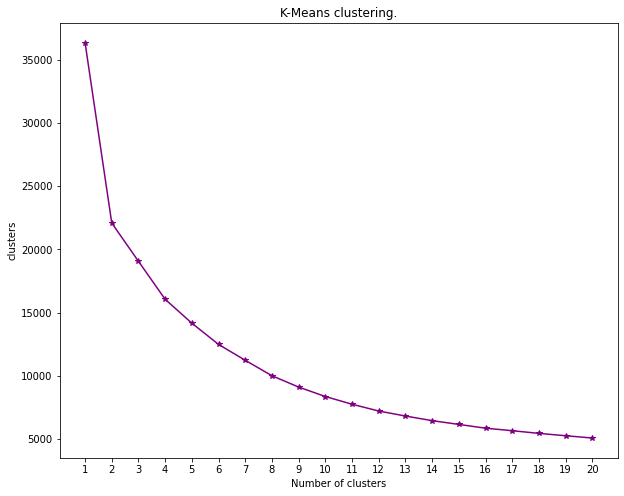

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),clusters,marker='*',color='purple')
plt.xlabel("Number of clusters")
plt.xticks(range(1,21))
plt.ylabel('clusters')
plt.title("K-Means clustering.")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(temp_data[['value','hours','day_of_week','month_number','year']])

KMeans(n_clusters=5, random_state=42)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(temp_data[['value','hours','day_of_week','month_number','year']])
temp_data[['pca1','pca2']]=pca.fit_transform(temp_data[['value','hours','day_of_week','month_number','year']])
temp_data.head()

,timestamp,value,month_number,year,hours,day_of_week,date_obj,temperature_C,pca1,pca2
0,2013-07-04 00:00:00,-0.320586,0.124589,-0.918667,-1.661537,0.005769,weekday night,21.044908,0.446018,-1.473699
1,2013-07-04 01:00:00,-0.005228,0.124589,-0.918667,-1.517172,0.005769,weekday night,21.789015,0.588578,-1.263483
2,2013-07-04 02:00:00,-0.085851,0.124589,-0.918667,-1.372807,0.005769,weekday night,21.598781,0.561030,-1.186671
3,2013-07-04 03:00:00,-0.537536,0.124589,-0.918667,-1.228442,0.005769,weekday night,20.533000,0.374078,-1.234867
4,2013-07-04 04:00:00,-0.461215,0.124589,-0.918667,-1.084077,0.005769,weekday night,20.713084,0.413951,-1.105181


In [ ]:
km=KMeans(n_clusters=5)
km.fit(temp_data[['pca1','pca2']])
temp_data['cluster']=km.predict(temp_data[['pca1','pca2']])

In [ ]:
temp_data.head()

,timestamp,value,month_number,year,hours,day_of_week,date_obj,temperature_C,pca1,pca2,cluster
0,2013-07-04 00:00:00,-0.320586,0.124589,-0.918667,-1.661537,0.005769,weekday night,21.044908,0.446018,-1.473699,2
1,2013-07-04 01:00:00,-0.005228,0.124589,-0.918667,-1.517172,0.005769,weekday night,21.789015,0.588578,-1.263483,2
2,2013-07-04 02:00:00,-0.085851,0.124589,-0.918667,-1.372807,0.005769,weekday night,21.598781,0.561030,-1.186671,2
3,2013-07-04 03:00:00,-0.537536,0.124589,-0.918667,-1.228442,0.005769,weekday night,20.533000,0.374078,-1.234867,2
4,2013-07-04 04:00:00,-0.461215,0.124589,-0.918667,-1.084077,0.005769,weekday night,20.713084,0.413951,-1.105181,2


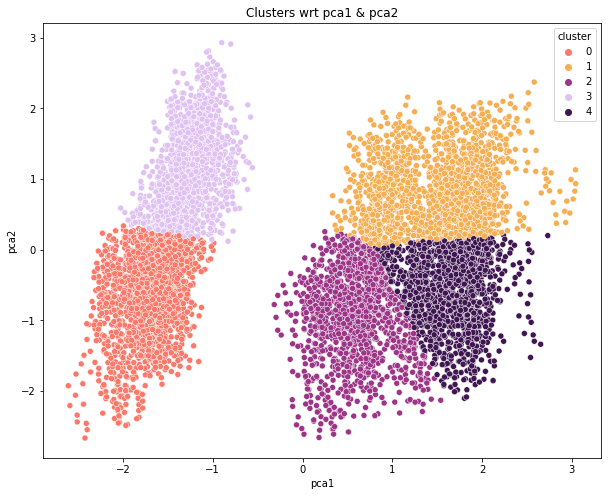

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(data=temp_data,x='pca1',y='pca2',hue='cluster',palette=['#FC7869','#F5AE52','#9C3587','#E0C2F2','#3F1651'])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title("Clusters wrt pca1 & pca2")
plt.show()

# Outliers fraction

In [ ]:
outliers_fraction1=0.01
Q1=temp_data['value'].quantile(0.25)
Q3=temp_data['value'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
num_outliers=temp_data[(temp_data['value']<(lower_limit)) | (temp_data['value']>(upper_limit))].shape[0]
outliers_fraction2=round((num_outliers/temp_data.shape[0]),3)

In [ ]:
print(f"Outliers with fraction {outliers_fraction2} is:{num_outliers}")

Outliers with fraction 0.005 is:35


# Gaussian Distribution

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
Weekday_Day=temp_data[temp_data['date_obj']=='weekday day'].copy()
Weekday_Night=temp_data[temp_data['date_obj']=='weekday night'].copy()
Weekend_Day=temp_data[temp_data['date_obj']=='weekend day'].copy()
Weekend_Night=temp_data[temp_data['date_obj']=='weekend night'].copy()

NameError: name 'temp_data' is not defined

In [ ]:
Weekday_Day['Pred_val']=EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekday_Day[['value']])
Weekday_Night['Pred_val']=EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekday_Night[['value']])
Weekend_Day['Pred_val']=EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekend_Day[['value']])
Weekend_Night['Pred_val']=EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekend_Night[['value']])

In [ ]:
gf1_anamoly1=len(Weekday_Day[Weekday_Day['Pred_val'].map(lambda x:x==-1)])
gf1_anamoly2=len(Weekday_Night[Weekday_Night['Pred_val'].map(lambda x:x==-1)])
gf1_anamoly3=len(Weekend_Day[Weekend_Day['Pred_val'].map(lambda x:x==-1)])
gf1_anamoly4=len(Weekend_Night[Weekend_Night['Pred_val'].map(lambda x:x==-1)])

In [ ]:
print(f'The num of anamolies in weekday day is:{gf1_anamoly1}')
print(f'The num of anamolies in weekday night is:{gf1_anamoly2}')
print(f'The num of anamolies in weekend day is:{gf1_anamoly3}')
print(f'The num of anamolies in weekend night is:{gf1_anamoly4}')

In [ ]:
GF1_anamoly=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [ ]:
anamoly=GF1_anamoly.loc[GF1_anamoly['Pred_val']==-1]
anamoly.head()

In [ ]:
sns.set_palette("Paired")
sns.histplot(anamoly,x='temperature_C',hue='Pred_val',multiple='stack',palette='viridis')

In [ ]:
sns.relplot(data=GF1_anamoly,x='temperature_C',y='date_obj',hue='Pred_val',col='date_obj',col_wrap=2,style="Pred_val",kind="scatter",palette='viridis')

In [ ]:
Weekday_Day=temp_data[temp_data['date_obj']=='weekday day'].copy()
Weekday_Night=temp_data[temp_data['date_obj']=='weekday night'].copy()
Weekend_Day=temp_data[temp_data['date_obj']=='weekend day'].copy()
Weekend_Night=temp_data[temp_data['date_obj']=='weekend night'].copy()

In [ ]:
Weekday_Day['Pred_val']=EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekday_Day[['value']])
Weekday_Night['Pred_val']=EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekday_Night[['value']])
Weekend_Day['Pred_val']=EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekend_Day[['value']])
Weekend_Night['Pred_val']=EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekend_Night[['value']])

In [ ]:
gf2_anamoly1=len(Weekday_Day[Weekday_Day['Pred_val'].map(lambda x:x==-1)])
gf2_anamoly2=len(Weekday_Night[Weekday_Night['Pred_val'].map(lambda x:x==-1)])
gf2_anamoly3=len(Weekend_Day[Weekend_Day['Pred_val'].map(lambda x:x==-1)])
gf2_anamoly4=len(Weekend_Night[Weekend_Night['Pred_val'].map(lambda x:x==-1)])

In [ ]:
print(f'The num of anamolies in weekday day is:{gf2_anamoly1}')
print(f'The num of anamolies in weekday night is:{gf2_anamoly2}')
print(f'The num of anamolies in weekend day is:{gf2_anamoly3}')
print(f'The num of anamolies in weekend night is:{gf2_anamoly4}')

In [ ]:
GF2_anamoly=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [ ]:
anamoly=GF2_anamoly.loc[GF2_anamoly['Pred_val']==-1]
anamoly.head()

In [ ]:
sns.set_palette("Paired")
sns.histplot(anamoly,x='temperature_C',hue='Pred_val',multiple='stack',palette='viridis')

In [ ]:
sns.relplot(data=GF2_anamoly,x='temperature_C',y='date_obj',hue='Pred_val',col='date_obj',col_wrap=2,style="Pred_val",kind="scatter",palette='viridis')

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
Weekday_Day=temp_data[temp_data['date_obj']=='weekday day'].copy()
Weekday_Night=temp_data[temp_data['date_obj']=='weekday night'].copy()
Weekend_Day=temp_data[temp_data['date_obj']=='weekend day'].copy()
Weekend_Night=temp_data[temp_data['date_obj']=='weekend night'].copy()

In [ ]:
Weekday_Day['Pred_val']=IsolationForest(contamination=outliers_fraction1).fit_predict(Weekday_Day[['value']])
Weekday_Night['Pred_val']=IsolationForest(contamination=outliers_fraction1).fit_predict(Weekday_Night[['value']])
Weekend_Day['Pred_val']=IsolationForest(contamination=outliers_fraction1).fit_predict(Weekend_Day[['value']])
Weekend_Night['Pred_val']=IsolationForest(contamination=outliers_fraction1).fit_predict(Weekend_Night[['value']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
if1_anamoly1=len(Weekday_Day[Weekday_Day['Pred_val'].map(lambda x:x==-1)])
if1_anamoly2=len(Weekday_Night[Weekday_Night['Pred_val'].map(lambda x:x==-1)])
if1_anamoly3=len(Weekend_Day[Weekend_Day['Pred_val'].map(lambda x:x==-1)])
if1_anamoly4=len(Weekend_Night[Weekend_Night['Pred_val'].map(lambda x:x==-1)])

In [ ]:
print(f'The num of anamolies in weekday day is:{if1_anamoly1}')
print(f'The num of anamolies in weekday night is:{if1_anamoly2}')
print(f'The num of anamolies in weekend day is:{if1_anamoly3}')
print(f'The num of anamolies in weekend night is:{if1_anamoly4}')

The num of anamolies in weekday day is:29
The num of anamolies in weekday night is:28
The num of anamolies in weekend day is:11
The num of anamolies in weekend night is:6


In [ ]:
if1_anamoly=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [ ]:
anamoly=if1_anamoly.loc[if1_anamoly['Pred_val']==-1]
anamoly.head()

,timestamp,value,month_number,year,hours,day_of_week,date_obj,temperature_C,pca1,pca2,cluster,Pred_val
103,2013-07-08 07:00:00,-2.128910,0.124589,-0.918667,-0.650983,-1.509529,weekday day,16.778049,-0.216074,-0.502816,2,-1
3732,2013-12-23 07:00:00,2.680545,1.475910,-0.918667,-0.650983,-1.509529,weekday day,28.126271,2.708687,0.898174,1,-1
3733,2013-12-23 08:00:00,2.679370,1.475910,-0.918667,-0.506618,-1.509529,weekday day,28.123499,2.715269,1.001752,1,-1
3734,2013-12-23 09:00:00,2.620776,1.475910,-0.918667,-0.362253,-1.509529,weekday day,27.985243,2.697184,1.085986,1,-1
3735,2013-12-23 10:00:00,2.373480,1.475910,-0.918667,-0.217888,-1.509529,weekday day,27.401733,2.598035,1.106648,1,-1


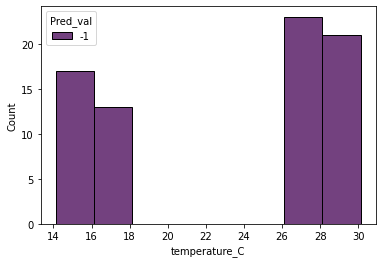

In [ ]:
sns.set_palette("Paired")
sns.histplot(anamoly,x='temperature_C',hue='Pred_val',multiple='stack',palette='viridis')

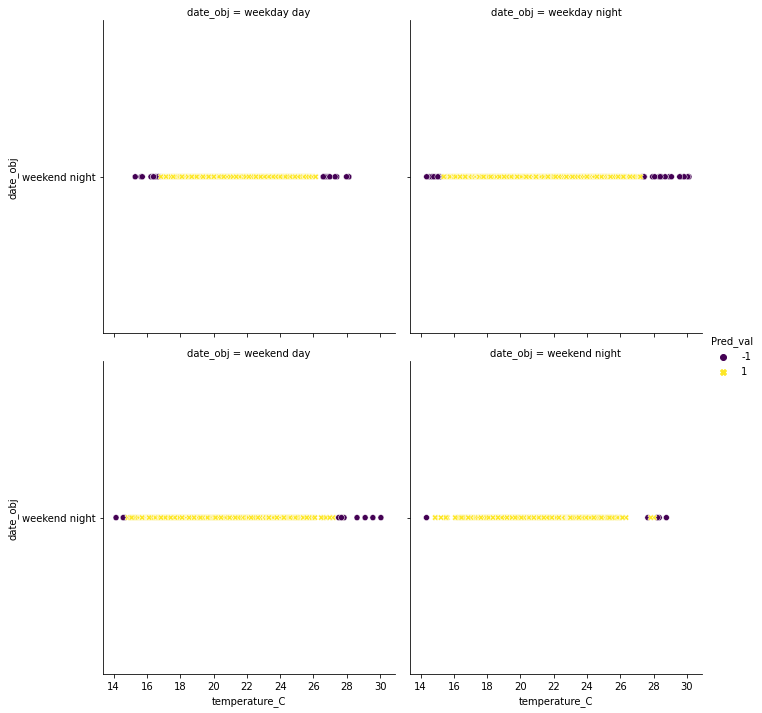

In [ ]:
sns.relplot(data=if1_anamoly,x='temperature_C',y='date_obj',hue='Pred_val',col='date_obj',col_wrap=2,style="Pred_val",kind="scatter",palette='viridis')

In [ ]:
Weekday_Day=temp_data[temp_data['date_obj']=='weekday day'].copy()
Weekday_Night=temp_data[temp_data['date_obj']=='weekday night'].copy()
Weekend_Day=temp_data[temp_data['date_obj']=='weekend day'].copy()
Weekend_Night=temp_data[temp_data['date_obj']=='weekend night'].copy()

In [ ]:
Weekday_Day['Pred_val']=IsolationForest(contamination=outliers_fraction2).fit_predict(Weekday_Day[['value']])
Weekday_Night['Pred_val']=IsolationForest(contamination=outliers_fraction2).fit_predict(Weekday_Night[['value']])
Weekend_Day['Pred_val']=IsolationForest(contamination=outliers_fraction2).fit_predict(Weekend_Day[['value']])
Weekend_Night['Pred_val']=IsolationForest(contamination=outliers_fraction2).fit_predict(Weekend_Night[['value']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
if2_anamoly1=len(Weekday_Day[Weekday_Day['Pred_val'].map(lambda x:x==-1)])
if2_anamoly2=len(Weekday_Night[Weekday_Night['Pred_val'].map(lambda x:x==-1)])
if2_anamoly3=len(Weekend_Day[Weekend_Day['Pred_val'].map(lambda x:x==-1)])
if2_anamoly4=len(Weekend_Night[Weekend_Night['Pred_val'].map(lambda x:x==-1)])

In [ ]:
print(f'The num of anamolies in weekday day is:{if2_anamoly1}')
print(f'The num of anamolies in weekday night is:{if2_anamoly2}')
print(f'The num of anamolies in weekend day is:{if2_anamoly3}')
print(f'The num of anamolies in weekend night is:{if2_anamoly4}')

The num of anamolies in weekday day is:15
The num of anamolies in weekday night is:14
The num of anamolies in weekend day is:6
The num of anamolies in weekend night is:3


In [ ]:
if2_anamoly=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [ ]:
anamoly=if2_anamoly.loc[if2_anamoly['Pred_val']==-1]
anamoly.head()

,timestamp,value,month_number,year,hours,day_of_week,date_obj,temperature_C,pca1,pca2,cluster,Pred_val
3732,2013-12-23 07:00:00,2.680545,1.47591,-0.918667,-0.650983,-1.509529,weekday day,28.126271,2.708687,0.898174,1,-1
3733,2013-12-23 08:00:00,2.679370,1.47591,-0.918667,-0.506618,-1.509529,weekday day,28.123499,2.715269,1.001752,1,-1
3734,2013-12-23 09:00:00,2.620776,1.47591,-0.918667,-0.362253,-1.509529,weekday day,27.985243,2.697184,1.085986,1,-1
3735,2013-12-23 10:00:00,2.373480,1.47591,-0.918667,-0.217888,-1.509529,weekday day,27.401733,2.598035,1.106648,1,-1
3736,2013-12-23 11:00:00,2.098141,1.47591,-0.918667,-0.073523,-1.509529,weekday day,26.752052,2.486840,1.117862,1,-1


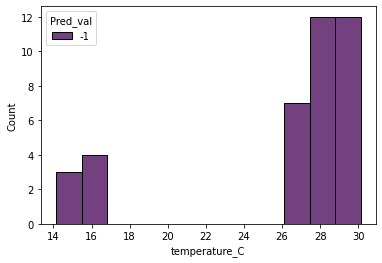

In [ ]:
sns.set_palette("Paired")
sns.histplot(anamoly,x='temperature_C',hue='Pred_val',multiple='stack',palette='viridis')

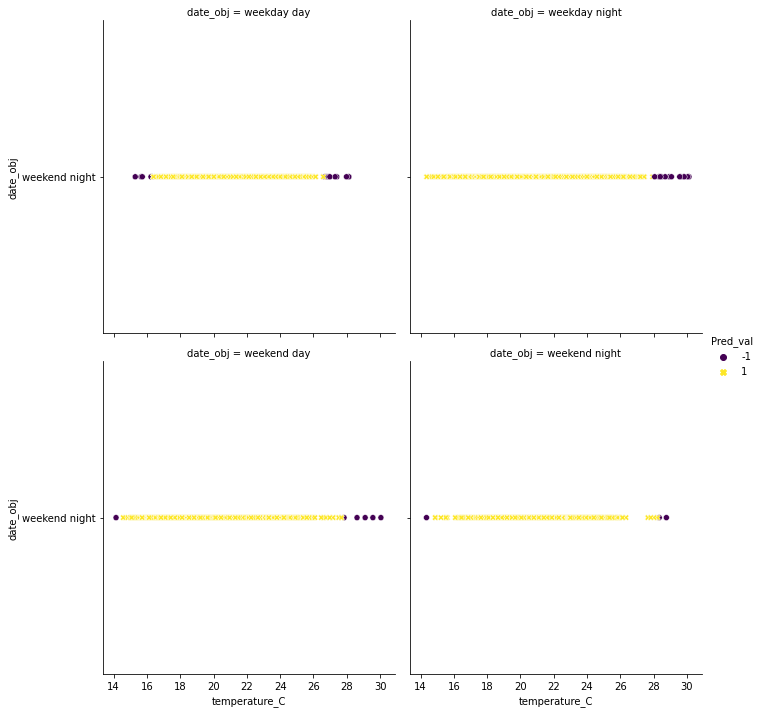

In [ ]:
sns.relplot(data=if2_anamoly,x='temperature_C',y='date_obj',hue='Pred_val',col='date_obj',col_wrap=2,style="Pred_val",kind="scatter",palette='viridis')

Overall Isolation forest performed better